In [141]:
# first we need to import some supporting libraries of python to work on this Data frame 


import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style



 From thisn data set we need to analyse "the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"  
 
 so here we need to concentrate on colums like "Tempreture(C)" and "Humidity" with respect to "Formatted date" which is recordd as hourly..


In [142]:
# Here am importing Data From my local environmnt

df = pd.read_csv('weatherHistory.csv')

In [143]:
# here am taking Brief look over the content in table

df.head(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [144]:
# to know how many rows and columns are prasent in data set
df.shape

(96453, 11)

In [145]:
# to know about datatyes 
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [146]:
#Default Time and Date are in Object format we need to convert that into time series objects 
# pd.to_datetime function convert given dat object into Time series format, 

    
    
df['Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

# Now am creating new colums of Date, Month,Year, and time by resampling data of Formatted date column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df.head(4)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1


In [147]:
# Now we need to remove unwanted data colums from the  Data set
# here the unwanted colums are "Precip Type" , "Daily Summary" and "Visibility (km)"
df.drop(["Visibility (km)","Daily Summary","Precip Type"],axis=1).head()


,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251,1015.13,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259,1015.63,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204,1015.94,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269,1016.41,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259,1016.51,2006-04-01 02:00:00+00:00,2006,4,1,2


In [148]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,3,31,22
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,3,31,23
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,4,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,4,1,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,4,1,2


In [149]:
# Now we taking required two columns by groupby month and year column by using pandas groupby Function

df_=df.groupby(["month","year"]).mean()
df_1=df_[["Apparent Temperature (C)","Humidity"]]
df_1

Apparent Temperature (C)  Humidity
month year                                    
1     2006                 -4.173708  0.834610
      2007                  2.387015  0.813495
      2008                 -2.069907  0.819476
      2009                 -3.669937  0.867621
      2010                 -4.329062  0.875914
...                              ...       ...
12    2012                 -3.672909  0.886801
      2013                 -0.690054  0.823965
      2014                  0.556586  0.835927
      2015                  0.828644  0.925390
      2016                 -2.017272  0.887981

[133 rows x 2 columns]

In [150]:
df_1.loc[12]

,Apparent Temperature (C),Humidity
year,,
2005,-4.050000,0.890000
2006,0.107310,0.905376
2007,-2.964897,0.856250
2008,0.327389,0.828226
2009,-0.169086,0.844637
2010,-3.485947,0.913602
2011,0.618093,0.866223
2012,-3.672909,0.886801
2013,-0.690054,0.823965


In [151]:
# Now we are checking Whenthere is a null values in boyh column by using isnull() function of pandas

df_1.isnull().sum()

Apparent Temperature (C)    0
Humidity                    0
dtype: int64

There is no null values in both columns. Now we plot the graphs with the help of libraries



Here the index are in time series format the best way of representing them are through line grah.it give more insite with respect to the catrgorical variables. but am ploting bar plot also becase it gives the best comparision between two variable ...
 
In this dataframe df_1 month index 1,2,3,4....,12 are represented as "January","february","March"... ,"december" respectively...

# January month Observation

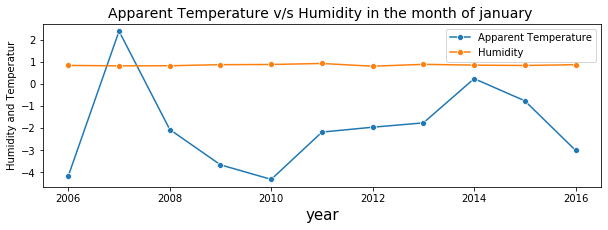

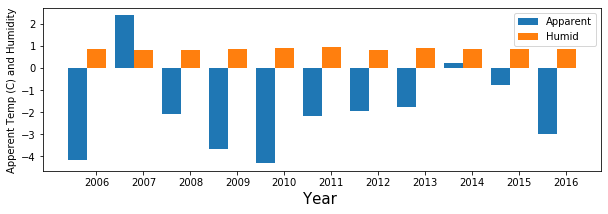

In [152]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[1].index,y=df_1.loc[1]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[1].index, y=df_1.loc[1]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of january ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[1])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[1]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[1]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

 Observation :
             By observing above graphs to the  january month of all Ten years data since 2006 to 2016 there is no change in average Humidity.But variation in average Apparent temperature (C) can be observed. In the year sudden increase in 2007 then again it dropped in 2010 .then again there is slight increse in 2014 but again it was drop in 2016 .

# Feb month obesrvation¶

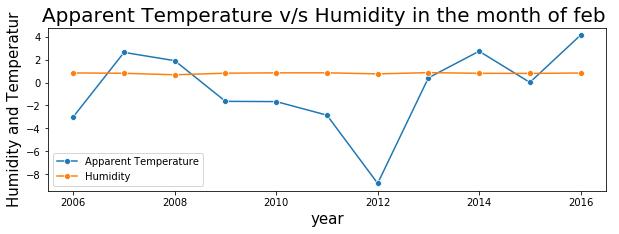

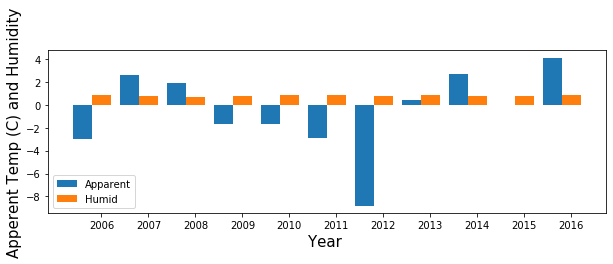

In [153]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[2].index,y=df_1.loc[2]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[2].index, y=df_1.loc[2]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of feb ", fontsize=20,)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=15)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[2])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[2]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[2]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=15)

plt.legend()
plt.show()

# march month observation

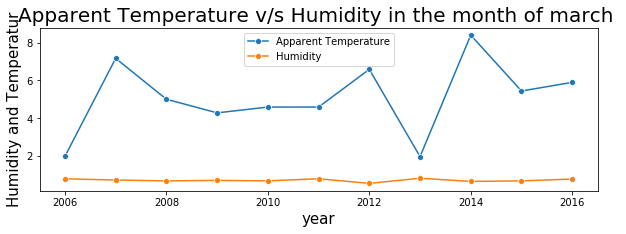

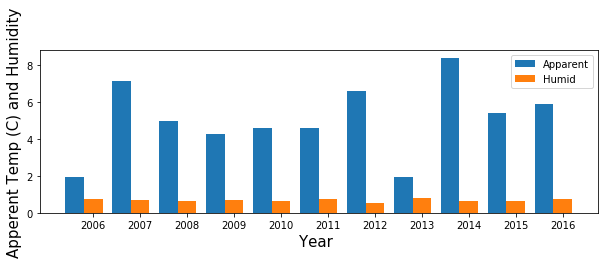

In [154]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[3].index,y=df_1.loc[3]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[3].index, y=df_1.loc[3]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of march ", fontsize=20,)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=15)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[3])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[3]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[3]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=15)

plt.legend()
plt.show()

# April month 

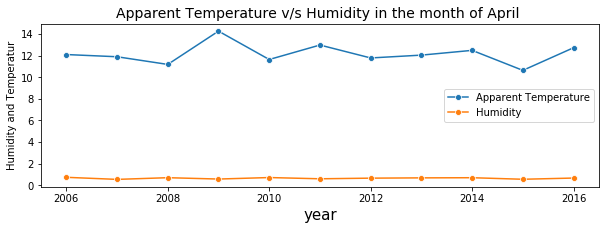

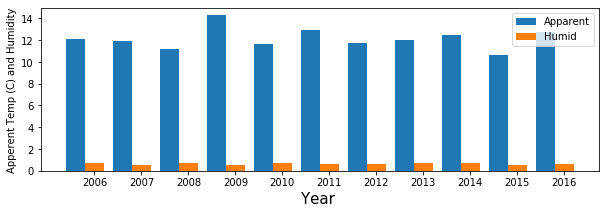

In [155]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[4].index,y=df_1.loc[4]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[4].index, y=df_1.loc[4]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of April ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[4])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[4]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[4]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# may month observation

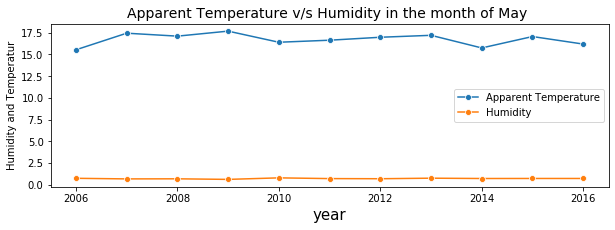

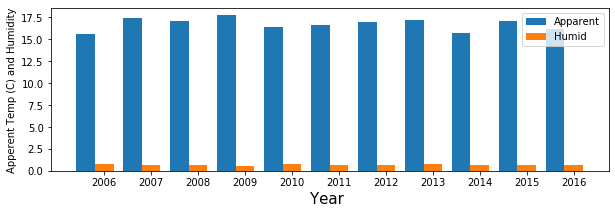

In [156]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[5].index,y=df_1.loc[5]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[5].index, y=df_1.loc[5]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of May ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[5])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[5]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[5]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# June monty 

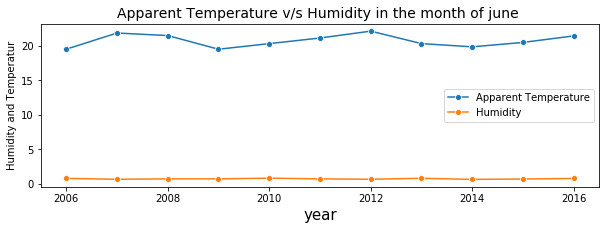

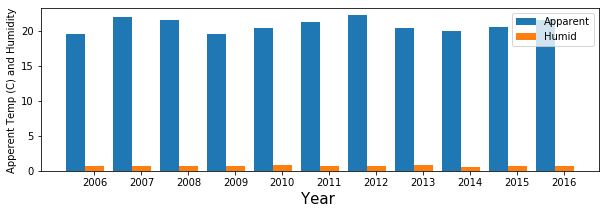

In [157]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[6].index,y=df_1.loc[6]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[6].index, y=df_1.loc[6]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of june ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[6])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[6]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[6]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# july month

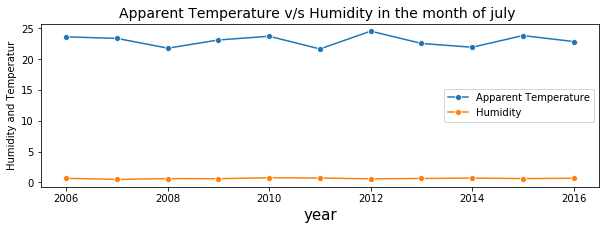

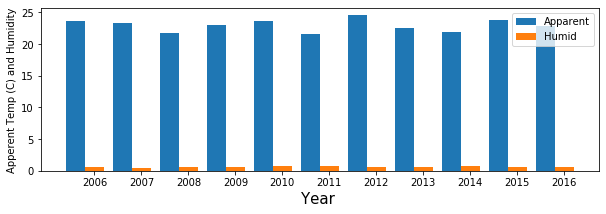

In [158]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[7].index,y=df_1.loc[7]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[7].index, y=df_1.loc[7]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of july ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[7])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[7]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[7]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# August month

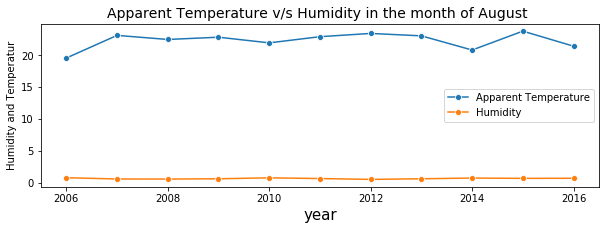

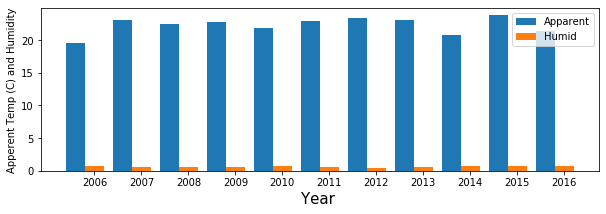

In [159]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[8].index,y=df_1.loc[8]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[8].index, y=df_1.loc[8]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of August ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[8])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[8]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[8]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# september month

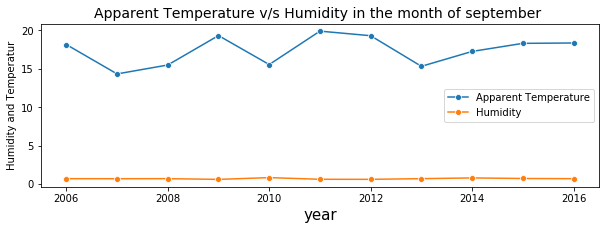

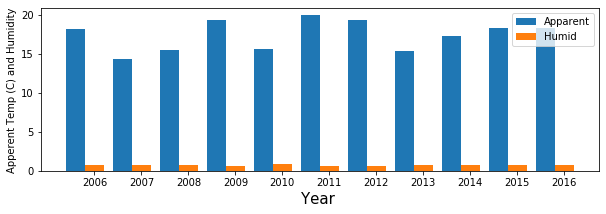

In [160]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[9].index,y=df_1.loc[9]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[9].index, y=df_1.loc[9]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of september ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[9])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[9]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[9]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# october month

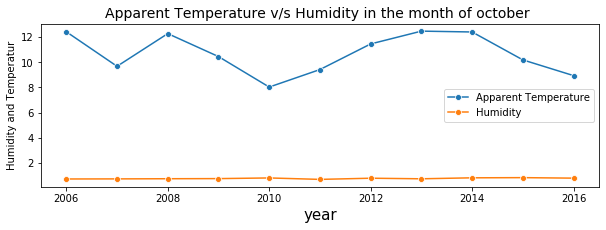

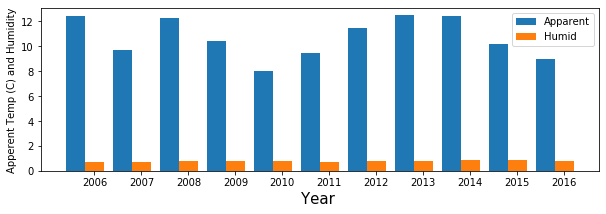

In [161]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[10].index,y=df_1.loc[10]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[10].index, y=df_1.loc[10]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of october ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[10])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[10]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[10]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# Navember month

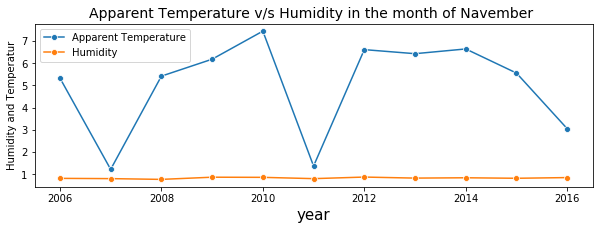

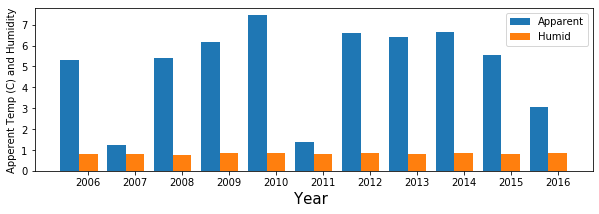

In [162]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[11].index,y=df_1.loc[11]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[11].index, y=df_1.loc[11]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of Navember ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[11])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[11]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[11]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

# December Month

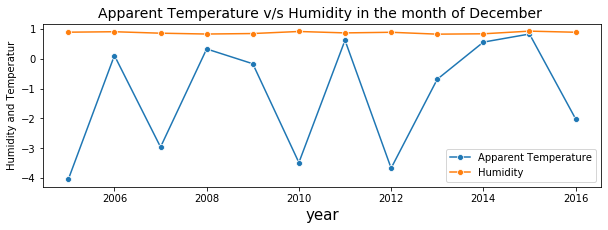

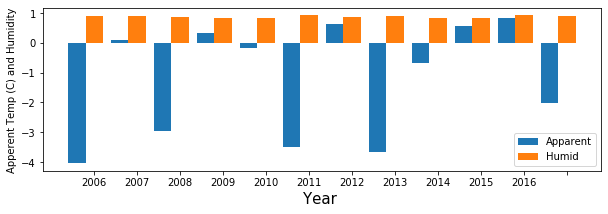

In [163]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_1.loc[12].index,y=df_1.loc[12]["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_1.loc[12].index, y=df_1.loc[12]["Humidity"],label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity in the month of December ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_.loc[12])) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_1.loc[12]["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_1.loc[12]["Humidity"],width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

In [164]:
# now we observe the over all mean variation of Humidity and Tenpareture variables with respect to the time(year)..
df_2=df_1.groupby("year").mean()
df_2

,Apparent Temperature (C),Humidity
year,,
2005,-4.050000,0.890000
2006,10.091090,0.767717
2007,11.008692,0.690331
2008,11.029242,0.701208
2009,11.008698,0.707834
2010,10.009624,0.797404
2011,10.511277,0.736254
2012,10.693165,0.689878
2013,10.770698,0.754963


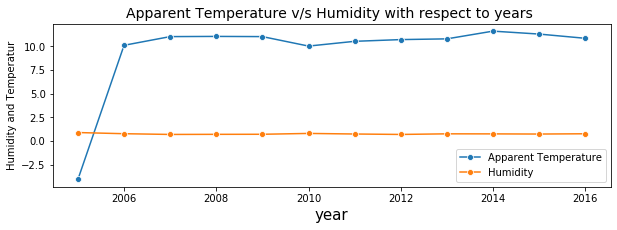

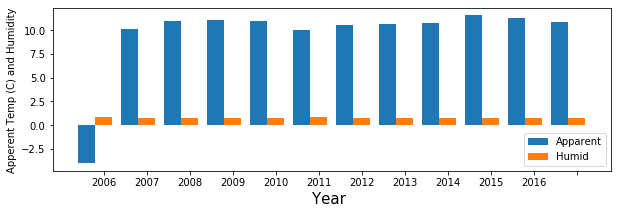

In [165]:
#here am defining th plot size
plt.subplots(figsize=(10,3))


# now am creating lineplot using seaborn library.
#here am giving data frame index as x-values and Apparent Temperature and Humidity as Y-axis 
sns.lineplot(x=df_2.index,y=df_2["Apparent Temperature (C)"],label="Apparent Temperature",marker="o")
sns.lineplot(x=df_2.index, y=df_2.Humidity,label="Humidity",marker= "o")
plt.title("Apparent Temperature v/s Humidity with respect to years ", fontsize=14)
plt.xlabel("year",fontsize=15)
plt.ylabel("Humidity and Temperatur",fontsize=10)
plt.show()


#Here creating the bar plot using seaborn
# to plot two differnt variables adjacent to each other we need to secify the bar width

w=0.4   # defining bar width as 0.4
plt.subplots(figsize=(10,3))
bar1=np.arange(len(df_2)) # For x-axis here am giving the length of dataframe index and its value..
bar2=[i+w for i in bar1]    # for another bar we need to add width of first bar1 for each value of bar2.it was done by using list comprahension method.
    
plt.bar(x=bar1, height=df_2["Apparent Temperature (C)"],width=0.4,label="Apparent")
plt.bar(x=bar2, height=df_2.Humidity,width=0.4,label="Humid")
plt.xticks(bar1+w,df_1.loc[1].index,fontsize=10)
plt.xlabel("Year " ,fontsize=15)
plt.ylabel("Apperent Temp (C) and Humidity",fontsize=10)

plt.legend()
plt.show()

Conclusion :-
  by observing above data set  he Humidity remains same over the Decades irrespective of seasons but the Apperent tempereture increasing singnificenty after the 2006 it doesnot getting lower in recent time period. in 2014 records the highest tempareture this shows the due to globle warming the Apperent tempereture increases rapidly which leqads that harmfull effects on life..